In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

---

# **Milestone 1 Phase 2**

## 1 - Perkenalan

```
Nama : Khalisul Akbar

Batch : FTDS-Batch 10
```


### Description



#### Objective :

```
Adapun objective yang ingin dicapai pada project ini adalah :
1. Exploratory Data Analysis untuk memperoleh pemahaman dataset yang baik.
2. Preprocessing data yang baik untuk mendapatkan model yang baik.
3. Features Engineering untuk mendapatkan Feature yang memiliki korelasi yang baik dengan Target.
4. Mampu mengimplementasikan logistic regression dan Mendapatkan model prediksi logistic regression.
5. Mampu mengimplementasikan SVM dan Mendapatkan model prediksi SVC.

```

#### Problem Statement :

```
Beberapa tahapan-tahapan yang harus dilalui pada project ini adalah :
1. Melakukan visualisasi dataset untuk mengetahui gambaran umum dari dataset yang digunakan.
2. Pengecekan dan menghandle outliers dan missing value.
3. Memilih Feature yang akan digunakan untuk membuat model dengan menghitung korelasi antara Feature dengan label/target.
4. Memingmplementasikan logistic regression dan svm untuk membuat model yang sesuai dengan objective atau dataset.
5. Melakukan pengetesan model yang telah dibuat dengan data inference.
```

---

## **Working Area**


## 2 - Import Libraries

In [2]:
# Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'
%matplotlib inline

## 3 - Data Loading

In [3]:
# Load the dataset

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Duplicate the dataset

df_ori = df.copy()

In [5]:
# Check Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


From the info above we can see that the dataset have 7043 rows with 21 columns. At a glance it seems that there are no missing values shown.

In [6]:
# Check Dataset's statistical info

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# Check Dataset's statistical info

df.describe(include=['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


From the table above, there are two columns we have to handle first, which are :
1. customersID which has number and string mixed in its values. However, since customersID's unique has 7043 from 7043 count, it means that we ccan drop this column since it is not essential.
2. TotalCharges which has numerical values but labeled as object. moreover it has 6531 unique value on 7043 count an, so we will check it later.

In [8]:
# Drop column

df.drop('customerID', axis=1, inplace=True)

In [9]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

there are 11 ' ' values, so it need to be change to np.nan first.

In [10]:
# Treat unknown as missing value

df = df.replace(' ', np.nan)



so then we can change df['TotalCharges'] to float

In [11]:
# change data type from object to float

df['TotalCharges'] = df['TotalCharges'].astype(float)

So, we can treat those ' ' values as missing values


In [12]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## 4 - Exploratory Data Analysis (EDA)

### 1. Taking a look at the numerical and categorical columns

In [13]:
# Get Numerical Columns and Categorical Columns (original)

num_columns = df.select_dtypes(include=np.number).columns.tolist()
cat_columns = df.select_dtypes(include=['object']).columns.tolist()

In [14]:
# Numerical columns

print('Numerical Columns : \n' , df[num_columns].nunique())

Numerical Columns : 
 SeniorCitizen        2
tenure              73
MonthlyCharges    1585
TotalCharges      6530
dtype: int64


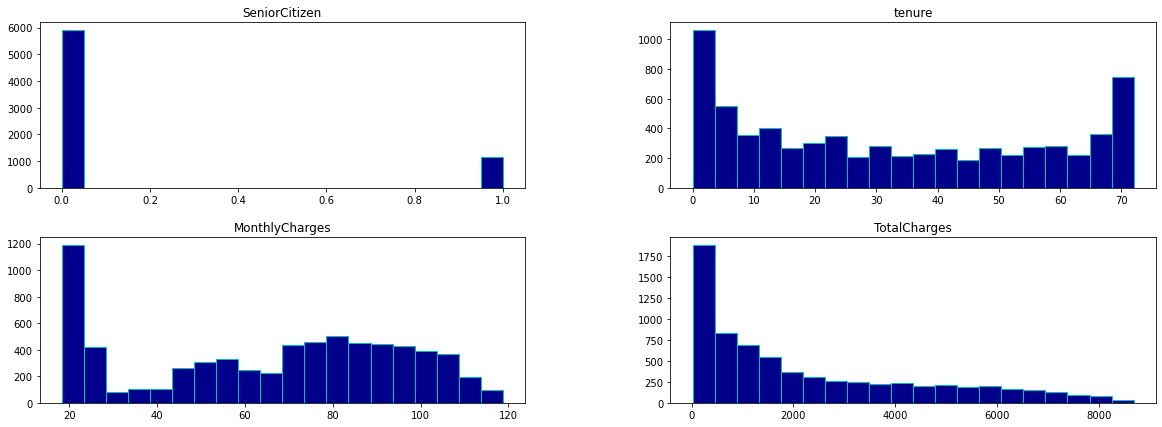

In [15]:
# Numerical column's value histogram

df.hist(bins=20, figsize=(20,7), grid=False, color='darkblue', edgecolor='c')
plt.show()

From histogram plot above we can conclude that :

*   From SeniorCitizen graph (Indicates if the customer is 65 or older) : older customers [1] is significantly lower than younger customers [0] 

*   Tenure Graph (indicate how long in month the customers has been with the Telco :  Customers tenure varies between 0 month to 72 months with 3 months-old customers has the highest number followed by 70-72 months-old customers as the second highest.

* Taking a look at the MonthlyCharges graph (the customer's Monthly charge) : it seems that most of the customers are getting charge at the cheapest rate at only 20 dollars monthly. However, there are also customer that getting charge at a rate of 40, 60 to 120 dollars.

* TotalCharge (indicate the total amount of charge the customers have to pay) : from the graph we can see that the customer charge rate varies from the lowest 18 dollars to the highses 8000++ dollars. However, most of the customers total charge is at around below 2000 dollars.




In [16]:
# Categorical columns

print('Categorical Columns : ')
for i in cat_columns:
    cat = df_ori[i].unique()
    print(f'{i} ({len(cat)}):',cat)
    print('----------------------------------------')



Categorical Columns : 
gender (2): ['Female' 'Male']
----------------------------------------
Partner (2): ['Yes' 'No']
----------------------------------------
Dependents (2): ['No' 'Yes']
----------------------------------------
PhoneService (2): ['No' 'Yes']
----------------------------------------
MultipleLines (3): ['No phone service' 'No' 'Yes']
----------------------------------------
InternetService (3): ['DSL' 'Fiber optic' 'No']
----------------------------------------
OnlineSecurity (3): ['No' 'Yes' 'No internet service']
----------------------------------------
OnlineBackup (3): ['Yes' 'No' 'No internet service']
----------------------------------------
DeviceProtection (3): ['No' 'Yes' 'No internet service']
----------------------------------------
TechSupport (3): ['No' 'Yes' 'No internet service']
----------------------------------------
StreamingTV (3): ['No' 'Yes' 'No internet service']
----------------------------------------
StreamingMovies (3): ['No' 'Yes' 'No inter

### 2. Plot the target column to see its value proportion 

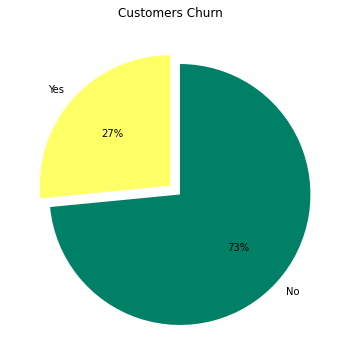

In [17]:
# Plot the target

explode = (0, 0.1)
plt.figure(figsize=(20,6))
df.groupby("Churn")['Churn'].count().sort_values().plot(kind='pie', autopct='%.0f%%' , ylabel='' , startangle=90, cmap= 'summer_r', explode=explode).set_title('Customers Churn')
plt.show()

From the pie chart above, we can see that the proportion between churn/Yes (27%) and No (73%) is not balanced. So we will have to balance it later using oversampling or undersasmpling method in order to improve model performance.

### 3. Churn Proportion by Gender, Partner, and Dependent

In [18]:
def stacked_plot(df, x, y, orient='h'):
      crosstab = pd.crosstab(index=df[x], columns=df[y])

      if orient == 'h':
            
          plt.figure(figsize=(16,10))
          crosstab.plot(kind='barh', stacked=True, color=['darkblue', 'cyan']).set_title(f'{y} by {x}')
          plt.legend(loc='upper right')
          plt.show()
      
      else :
          plt.figure(figsize=(16,10))
          crosstab.plot(kind='bar', stacked=True, color=['darkblue', 'cyan']).set_title(f'{y} by {x}')
          plt.legend(loc='upper right')
          plt.show()

1. by gender

<Figure size 1152x720 with 0 Axes>

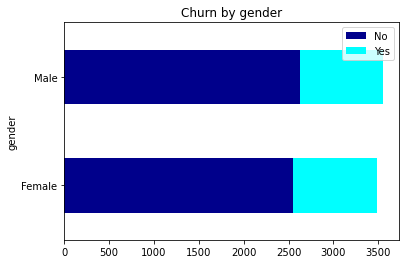

In [19]:
stacked_plot(df, 'gender', 'Churn')

`According to its gender, the number of male and female who terminated the Telco(Churn) is quite similar.`

2. by Partner

<Figure size 1152x720 with 0 Axes>

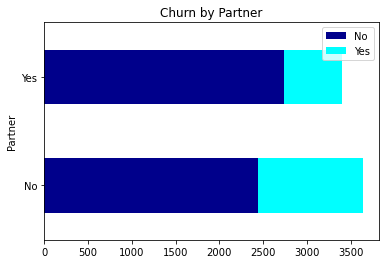

In [20]:
stacked_plot(df, 'Partner', 'Churn')

`according to the graph above, the customers with NO partner have higher probability to stop the Telco service(Churn) than the customers with Partners.`  

3. by Dependents

<Figure size 1152x720 with 0 Axes>

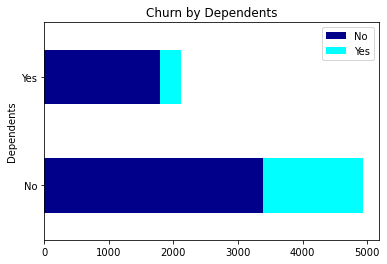

In [21]:
stacked_plot(df, 'Dependents', 'Churn')

`If we take a look at whether the customer has dependents or not, we can see that people who have Dependents are smaller in number than people who dont have dependents. Furthermore, the customers with No dependents have higher probability to churn.`

### 4. Churn by Telco Services

In [22]:
def countplot(df, variable1, variable2, hue = None , rotate=False):
    fig, ax = plt.subplots(ncols= 2, figsize=(20,6))
    sns.countplot(data=df , x=variable1, palette='magma' , hue= hue , ax=ax[0]).set_title(f'{variable1}')
    ax[0].tick_params(axis='x', rotation=45) if rotate == True else False
    sns.countplot(data=df , x=variable2, palette='magma' ,hue= hue , ax=ax[1]).set_title(f'{variable2}')
    ax[1].tick_params(axis='x', rotation=45) if rotate == True else False
    plt.show

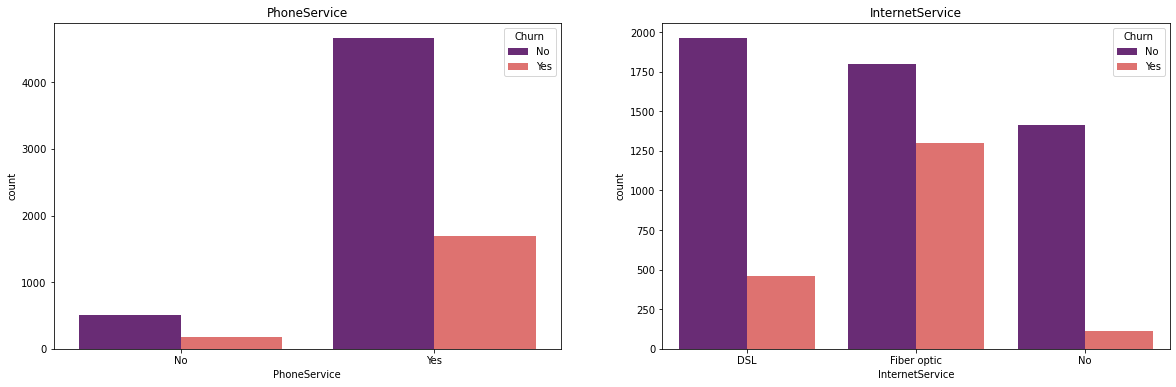

In [23]:
countplot(df, 'PhoneService', 'InternetService', hue='Churn')

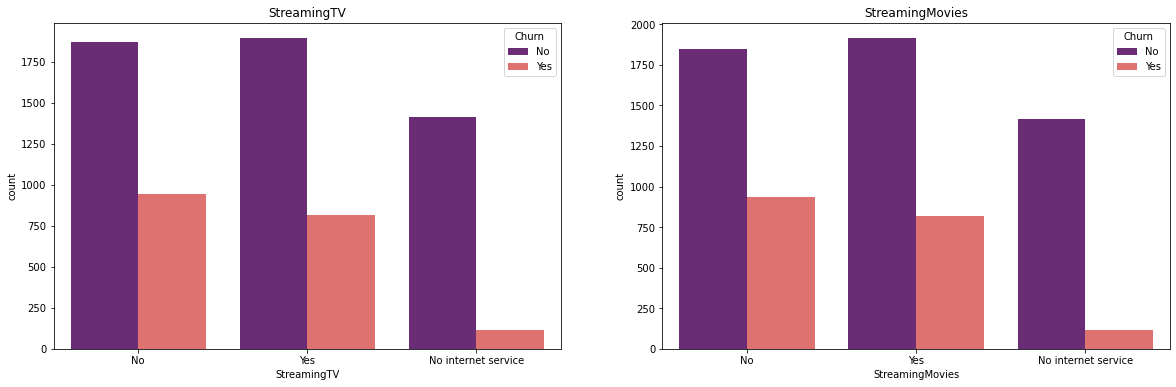

In [24]:
countplot(df, 'StreamingTV', 'StreamingMovies', hue='Churn')

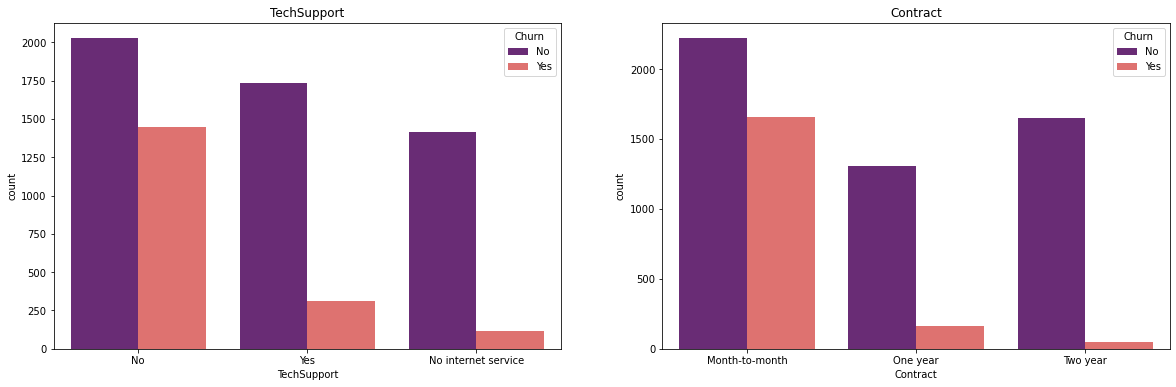

In [25]:
countplot(df, 'TechSupport', 'Contract', hue='Churn')

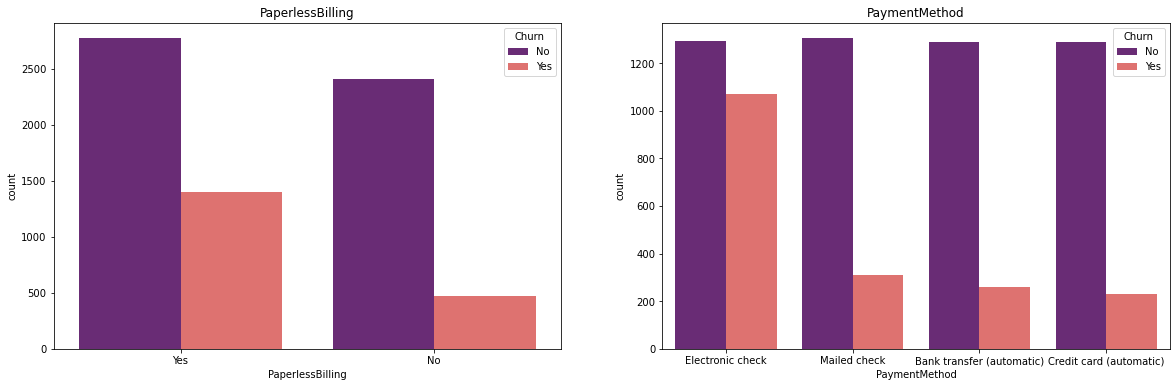

In [26]:
countplot(df, 'PaperlessBilling', 'PaymentMethod', hue='Churn')

---
## 5 - Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

### 1. Data Inference

In [27]:
# Get Data for Model Inference

data_inf = df.sample(43, random_state=17)
data_inf.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3616,Female,1,Yes,No,69,Yes,No,Fiber optic,Yes,Yes,No,No,No,Yes,One year,No,Credit card (automatic),87.30,6055.55,No
2055,Male,0,No,No,45,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),108.45,4964.70,No
5394,Female,0,Yes,No,48,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),105.10,5083.55,No
3697,Female,0,Yes,Yes,32,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,No,Month-to-month,No,Electronic check,89.60,2901.80,No
2516,Female,1,No,No,16,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.40,1581.20,Yes


In [28]:
# Remove Inference-Set from Dataset

data_train_test = df.drop(data_inf.index)
data_train_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,1,Yes,No,69,Yes,No,Fiber optic,Yes,Yes,No,No,No,Yes,One year,No,Credit card (automatic),87.30,6055.55,No
1,Male,0,No,No,45,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),108.45,4964.70,No
2,Female,0,Yes,No,48,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),105.10,5083.55,No
3,Female,0,Yes,Yes,32,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,No,Month-to-month,No,Electronic check,89.60,2901.80,No
4,Female,1,No,No,16,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.40,1581.20,Yes


### 2. Splitting Dataset

In [30]:
# Split between X (features) and y (target)

X = data_train_test.drop('Churn', axis=1)
y = data_train_test['Churn']
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
6996,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
6997,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
6998,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [31]:
# Split between Train-Set and Test-Set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=17)

print('X_Train Size : ', X_train.shape)
print('X_Test Size  : ', X_test.shape)
print('y_train :' , y_train.shape)
print('y_test :', y_test.shape)

X_Train Size :  (5600, 19)
X_Test Size  :  (1400, 19)
y_train : (5600,)
y_test : (1400,)


In [32]:
# Split X_train, y_train into X_val and y_val for validation purpose

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=17)

print('X_Train Size : ', X_train.shape)
print('X_val Size  : ', X_val.shape)
print('y_train :' , y_train.shape)
print('y_val :', y_val.shape)

X_Train Size :  (5040, 19)
X_val Size  :  (560, 19)
y_train : (5040,)
y_val : (560,)


### 3. Handling Outlier

In [33]:
# Function to create histogram and cecking outlier.

def cek_outlier(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30, kde=True, color='grey', edgecolor='black')
    plt.title(f'{variable} Histogram')

    cek_skew0 = df[variable].skew()
    print (f'{variable} Skewness :', cek_skew0)

    #normal distirbution
    upper = df[variable].mean() + 3*df[variable].std()
    lower = df[variable].mean() - 3*df[variable].std()
    outlier_upper = df[df[variable] > upper]
    outlier_lower = df[df[variable] < lower]
    total_normal = pd.concat([outlier_upper, outlier_lower])

    #skewed distribution
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_skew = df[variable].quantile(0.25) - (IQR * 3)
    upper_skew = df[variable].quantile(0.75) + (IQR * 3)
    outlier_upper_skew = df[df[variable] > upper_skew]
    outlier_lower_skew = df[df[variable] < lower_skew]
    total_skew = pd.concat([outlier_upper_skew + outlier_lower_skew])

    if cek_skew0 < 0.5 and cek_skew0 > -0.5:
        # Boxplot normal distribution
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[variable], whis=3, palette= 'Greys')
        plt.title('Boxplot normal dist.')
        plt.show()
        
        print(f'normal distribution - Jumlah {variable} outlier : ', len(total_normal))
        print('jumlah data : ' , len(df[variable]))
        print('% upper outliers : ' , np.round((len(outlier_upper)/len(df[variable]) * 100),3))
        print('% lower outliers : ' , np.round((len(outlier_lower)/len(df[variable]) * 100),3))
        print('% Total outliers : ', np.round(((len(outlier_upper)/len(df[variable]) * 100) + (len(outlier_lower)/len(df[variable]) * 100)),3))
        print('--------------------------------------------------------------------------------------------------------\n')
    else :
        # Boxplot skewed distribution
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[variable], whis=3, palette= 'Greys', showmeans=True)
        plt.title('Boxplot skewed dist.')
        plt.show()

        # Mean, median, modus
        mean = df[variable].mean()
        median = df[variable].median()
        mode = df[variable].mode()[0]

        if  mean > median and median > mode :
            print (f'Right skewed distribution, Jumlah {variable} outlier : ', len(total_skew))
        elif mean < median and median < mode :
            print (f'Left skewed distribution, Jumlah {variable} outlier : ', len(total_skew))
        else:
            print(f'skewed distribution, Jumlah {variable} outlier : ', len(total_skew))
            
        # print(f'Jumlah {variable} outlier : ', len(total_skew))
        print('jumlah data : ' , len(df[variable]))
        print('% upper outliers : ' , np.round((len(outlier_upper_skew)/len(df[variable]) * 100),3))
        print('% lower outliers : ' , np.round((len(outlier_lower_skew)/len(df[variable]) * 100),3))
        print('% Total outliers : ', np.round(((len(outlier_upper_skew)/len(df[variable]) * 100) + (len(outlier_lower_skew)/len(df[variable]) * 100)),3))
        print('--------------------------------------------------------------------------------------------------------\n')

# Function to see precentage of every outlier  
def rank_normal(df, variable):
    #normal distirbution
    upper = df[variable].mean() + 3*df[variable].std()
    lower = df[variable].mean() - 3*df[variable].std()
    outlier_upper = df[df[variable] > upper]
    outlier_lower = df[df[variable] < lower]
    total_normal = pd.concat([outlier_upper, outlier_lower])
    pctg = (len(total_normal)/len(df[variable])* 100)
    print(f'{variable} : {len(total_normal)}  ({round(pctg,2)})%')

def rank_skew(df, variable):
    #skewed distribution
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_skew = df[variable].quantile(0.25) - (IQR * 3)
    upper_skew = df[variable].quantile(0.75) + (IQR * 3)
    outlier_upper_skew = df[df[variable] > upper_skew]
    outlier_lower_skew = df[df[variable] < lower_skew]
    total_skew = pd.concat([outlier_upper_skew + outlier_lower_skew])
    pctg = (len(total_skew)/len(df[variable])* 100)
    print(f'{variable} : {len(total_skew)}  ({round(pctg,2)})%')

- ##### X_train :

In [34]:
num_col = X_train.select_dtypes(include=np.number).columns.tolist()
print(num_col)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


SeniorCitizen Skewness : 1.7893869816826768


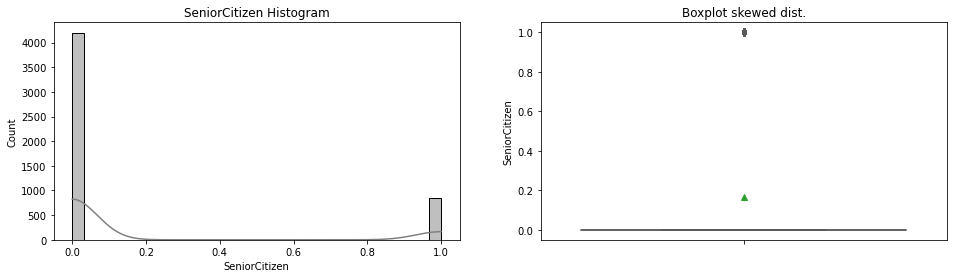

skewed distribution, Jumlah SeniorCitizen outlier :  840
jumlah data :  5040
% upper outliers :  16.667
% lower outliers :  0.0
% Total outliers :  16.667
--------------------------------------------------------------------------------------------------------

tenure Skewness : 0.2367521104344726


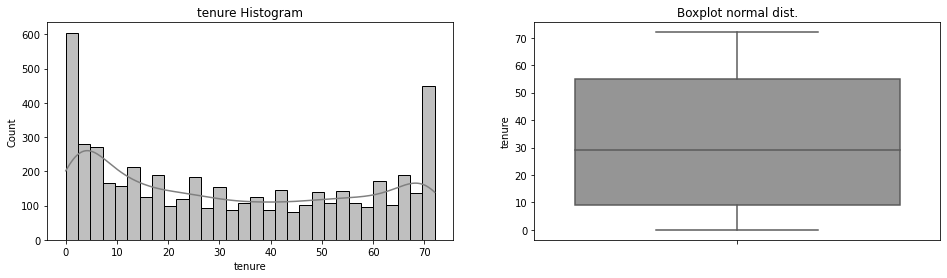

normal distribution - Jumlah tenure outlier :  0
jumlah data :  5040
% upper outliers :  0.0
% lower outliers :  0.0
% Total outliers :  0.0
--------------------------------------------------------------------------------------------------------

MonthlyCharges Skewness : -0.2476867709918359


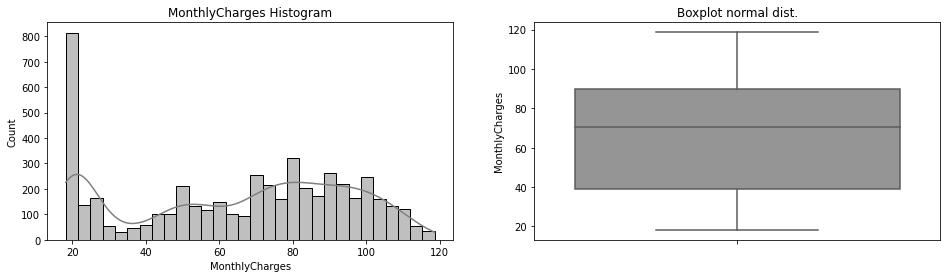

normal distribution - Jumlah MonthlyCharges outlier :  0
jumlah data :  5040
% upper outliers :  0.0
% lower outliers :  0.0
% Total outliers :  0.0
--------------------------------------------------------------------------------------------------------

TotalCharges Skewness : 0.9419388280144597


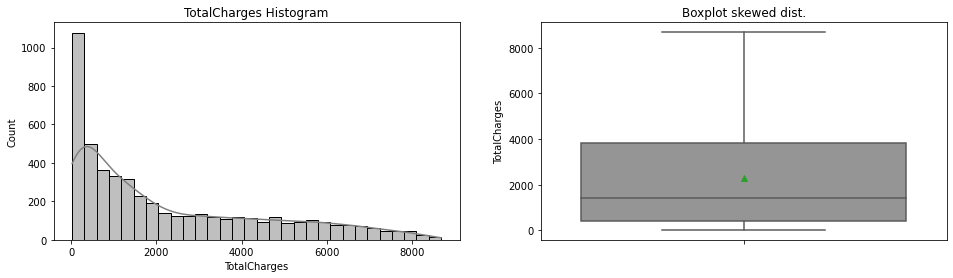

Right skewed distribution, Jumlah TotalCharges outlier :  0
jumlah data :  5040
% upper outliers :  0.0
% lower outliers :  0.0
% Total outliers :  0.0
--------------------------------------------------------------------------------------------------------



In [35]:
for i in num_col:
    cek_outlier(X_train, i)

In [36]:
# looping untuk membagi data normal distribution dan skewed distribution
normal = []
skew = []
for i in num_col:
    if X_train[i].skew() > - 0.5 and X_train[i].skew() < 0.5 :
        normal.append(i)
    else :
        skew.append(i)

print('Normal :\n----------------------')
for i in normal:
    rank_normal(X_train, i)
print('\nSkewed : \n--------------------------')
for i in skew:
    rank_skew(X_train, i)

Normal :
----------------------
tenure : 0  (0.0)%
MonthlyCharges : 0  (0.0)%

Skewed : 
--------------------------
SeniorCitizen : 840  (16.67)%
TotalCharges : 0  (0.0)%


`From the result above, we can see that the only outliers we have is from SeniorCitizen. However, if we take a closer look at its value, i think it is not an outlier that need to be handled. Its value is how it is collected from customers.`

- ##### y_train :

`No outliers.`


###  4. Handling Missing Values

#### TRAIN SET

* X_train :

In [37]:
# Checking missing values

missing = pd.DataFrame(X_train.isnull().sum(), columns = ['missing value'])
missing['%pctg'] = (missing/len(X_train)).round(3) * 100
missing[missing['missing value'] > 0].sort_values(by='%pctg')

,missing value,%pctg
TotalCharges,9,0.2


`a small number of missing values that we can handle by simply dropping the rows.`

In [38]:
# Drop missing values

X_train.dropna(axis=0, subset=['TotalCharges'], inplace=True)

* y_train :

In [39]:
X_train.shape

(5031, 19)

In [40]:
y_train.shape

(5040,)

In [41]:
# make the dimensions of y_train similar to X_train

y_train = y_train.loc[X_train.index]

In [42]:
# check the rsult 

y_train.shape

(5031,)

#### TEST SET

* X_test :

In [43]:
X_test.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        1
dtype: int64

In [44]:
# Drop missing values

X_test.dropna(axis=0, subset=['TotalCharges'], inplace=True)

* y_test :

In [45]:
# make the dimensions of y_train similar to X_train

y_test = y_test.loc[X_test.index]

#### Validation SET

* X_val

In [46]:
X_val.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        1
dtype: int64

In [47]:
# Drop missing values

X_val.dropna(axis=0, subset=['TotalCharges'], inplace=True)

* y_val

In [48]:
# make the dimensions of y_train similar to X_train

y_val = y_val.loc[X_val.index]

### 5. Handling Imbalance

* Split X_train into numerical and categorical

In [49]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('\n------------------------------------------------------------------------------------------\n')
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

------------------------------------------------------------------------------------------

Categorical Columns :  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [50]:
# Split Train-Set in to Categorical dan numerical

X_train_imbalanced_num = X_train[num_columns].reset_index().drop(['index'], axis = 1)
X_train_imbalanced_cat = X_train[cat_columns].reset_index().drop(['index'], axis = 1)

* Feature scaling

In [51]:
# Numeric Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc = sc.fit(X_train_imbalanced_num)
X_train_imbalanced_num = sc.transform(X_train_imbalanced_num)

* Merge with Categorical Column

In [52]:
# Merge with Categorical Column

X_train_imbalanced_new = pd.DataFrame(data=X_train_imbalanced_num, columns=num_columns)
X_train_imbalanced_new = pd.concat([X_train_imbalanced_new, X_train_imbalanced_cat], axis=1)
X_train_imbalanced_new

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,-0.447694,-1.201291,-0.686443,-0.948163,Female,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check
1,-0.447694,0.392263,1.368876,0.983652,Male,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic)
2,-0.447694,0.555704,-1.523299,-0.634600,Male,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
3,-0.447694,-0.424944,-1.513257,-0.805578,Female,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check
4,-0.447694,-0.343224,0.481808,-0.160039,Female,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,-0.447694,-0.751827,0.523651,-0.503456,Female,Yes,Yes,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic)
5027,-0.447694,-1.037849,0.322806,-0.774175,Female,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
5028,-0.447694,0.800866,1.253390,1.260457,Female,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic)
5029,-0.447694,1.372911,-1.198599,-0.135939,Male,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,One year,No,Credit card (automatic)


* SMOTENC

In [53]:
y_train.value_counts()

No     3695
Yes    1336
Name: Churn, dtype: int64

In [54]:
# SMOTE-NC

from imblearn.over_sampling import SMOTENC

smotenc = SMOTENC([4,5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], random_state = 42)
X_train, y_train = smotenc.fit_resample(X_train_imbalanced_new, y_train)
y_train.value_counts()

No     3695
Yes    3695
Name: Churn, dtype: int64

`Now that the column target Churn is balanced by using oversampling SMOTENC method.`

### 5. Feature Selection

##### 1. Label Encoding

In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train)

# Encode
y_train = le.transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

In [56]:
# check the encoding result
y_train

array([0, 1, 0, ..., 1, 1, 1])

##### 2. Handling confusing value by mapping

There are several columns that have confusing value in it so we have to handle it by mapping/replacing its value manually. The aforementioned columns are :

        * MultipleLines (3): ['No phone service' 'No' 'Yes']

        * OnlineSecurity (3): ['No' 'Yes' 'No internet service']

        * OnlineBackup (3): ['Yes' 'No' 'No internet service']

        * DeviceProtection (3): ['No' 'Yes' 'No internet service']

        * TechSupport (3): ['No' 'Yes' 'No internet service']

        * StreamingTV (3): ['No' 'Yes' 'No internet service']

        * StreamingMovies (3): ['No' 'Yes' 'No internet service']

In this case i would like to use replace method to change Both 'No phone service' and 'No internet service' to No.

In [57]:
# Replace value 

X_train = X_train.replace('No phone service', 'No')
X_train = X_train.replace('No internet service', 'No')

X_test = X_test.replace('No phone service', 'No')
X_test = X_test.replace('No internet service', 'No')

X_val = X_val.replace('No phone service', 'No')
X_val = X_val.replace('No internet service', 'No')

In [58]:
# Checking the result

X_col = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

print('Categorical Columns : ')
for i in X_col:
    cat = X_train[i].unique()
    print(f'{i} ({len(cat)}):',cat)
    print('----------------------------------------')


Categorical Columns : 
MultipleLines (2): ['No' 'Yes']
----------------------------------------
OnlineSecurity (2): ['No' 'Yes']
----------------------------------------
OnlineBackup (2): ['No' 'Yes']
----------------------------------------
DeviceProtection (2): ['No' 'Yes']
----------------------------------------
TechSupport (2): ['No' 'Yes']
----------------------------------------
StreamingTV (2): ['No' 'Yes']
----------------------------------------
StreamingMovies (2): ['No' 'Yes']
----------------------------------------


### 6. Split between numerical and categorical columns


In [59]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('------------------------------------------------------------------------------------')
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
------------------------------------------------------------------------------------
Categorical Columns :  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [60]:
# Split Train-Set and Test-Set based on Column Type (Numerical/Categorical)

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_val_num = X_val[num_columns]
X_val_cat = X_val[cat_columns]

### 7. Feature Scaling

In [61]:
# Display X_train_num

X_train_num

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.447694,-1.201291,-0.686443,-0.948163
1,-0.447694,0.392263,1.368876,0.983652
2,-0.447694,0.555704,-1.523299,-0.634600
3,-0.447694,-0.424944,-1.513257,-0.805578
4,-0.447694,-0.343224,0.481808,-0.160039
...,...,...,...,...
7385,-0.447694,-0.868795,0.462419,-0.627879
7386,2.233671,0.665199,1.391671,1.261704
7387,-0.447694,-1.254260,-0.829343,-0.986493
7388,-0.447694,-1.206332,0.470652,-0.909956


`X_train is already encoded in previous step, so we only need to scale X_test and X_val.`

In [62]:
X_test_num = sc.transform(X_test_num)
X_val_num = sc.transform(X_val_num)

In [63]:
X_test_num

array([[-0.44769352,  0.02451945,  0.46507124,  0.10671934],
       [-0.44769352,  0.84172627, -1.32914881, -0.42232626],
       [-0.44769352, -0.34322361,  0.65420078, -0.13268563],
       ...,
       [-0.44769352, -0.75182702, -0.50400843, -0.71765436],
       [-0.44769352, -0.38408395,  0.60064197, -0.11418475],
       [-0.44769352,  0.02451945,  0.10020186, -0.05272906]])

In [64]:
X_val_num

array([[ 2.23367091,  0.31054184,  0.880152  ,  0.61226263],
       [-0.44769352,  0.76000559,  0.60231569,  0.79631986],
       [-0.44769352, -0.87440804, -1.19357808, -0.86035018],
       ...,
       [ 2.23367091,  0.22882116, -1.50823608, -0.68797771],
       [-0.44769352,  1.29119001, -1.36764421, -0.30499171],
       [-0.44769352, -1.24215111, -1.53166805, -1.00149687]])

### 8. Feature Encoding

In [65]:
# Display X_train_cat

X_train_cat

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check
1,Male,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic)
2,Male,Yes,Yes,Yes,No,No,No,No,No,No,No,No,Two year,No,Credit card (automatic)
3,Female,No,No,Yes,No,No,No,No,No,No,No,No,Month-to-month,Yes,Mailed check
4,Female,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7385,Female,No,No,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
7386,Male,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
7387,Female,No,No,No,No,DSL,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check
7388,Female,No,No,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check


In [66]:
# Feature Encoding using One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

encoder =  OneHotEncoder(sparse=False)
encoder.fit(X_train_cat)

X_train_cat_enc = encoder.transform(X_train_cat)
X_test_cat_enc = encoder.transform(X_test_cat)
X_val_cat_enc = encoder.transform(X_val_cat)

In [67]:
X_train_cat_enc

array([[1., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 1.]])

In [68]:
# make columns name
test = encoder.get_feature_names_out(X_train_cat.columns.tolist())
column_cat = test.tolist()
column_cat

['gender_Female',
 'gender_Male',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'PhoneService_No',
 'PhoneService_Yes',
 'MultipleLines_No',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_No',
 'PaperlessBilling_Yes',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

### 9. Concat between Numerical Columns and Categorical Columns

In [69]:
# Merge Numerical Features with Categorical Column

# X_train
X_train_cat = pd.DataFrame(data=X_train_cat_enc, columns=column_cat)
X_train_final = pd.concat([X_train_num, X_train_cat], axis=1)
X_train_final

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.447694,-1.201291,-0.686443,-0.948163,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.447694,0.392263,1.368876,0.983652,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,-0.447694,0.555704,-1.523299,-0.634600,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,-0.447694,-0.424944,-1.513257,-0.805578,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.447694,-0.343224,0.481808,-0.160039,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7385,-0.447694,-0.868795,0.462419,-0.627879,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7386,2.233671,0.665199,1.391671,1.261704,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7387,-0.447694,-1.254260,-0.829343,-0.986493,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7388,-0.447694,-1.206332,0.470652,-0.909956,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [70]:
# X_test and X_val
X_test_final = np.concatenate([X_test_num, X_test_cat_enc], axis=1)
X_val_final = np.concatenate([X_val_num, X_val_cat_enc], axis=1)

In [71]:
print('X_train_final :' ,X_train_final.shape)
print('X_test_final :' ,X_test_final.shape)
print('X_val_final :' ,X_val_final.shape)

X_train_final : (7390, 38)
X_test_final : (1399, 38)
X_val_final : (559, 38)


---
## 6 - Model Definition : ANN

In [72]:
# Sequential API
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [73]:

# # Buat arsiteknya
# model = Sequential()
# model.add(Dense(1478, activation='relu', input_shape=(38,))) # HIDDEN LAYER 1
# model.add(Dropout(0.5))
# model.add(Dense(1000, activation='relu')) # HIDDEN LAYER 2
# model.add(Dropout(0.5))
# model.add(Dense(600, activation='relu')) # HIDDEN LAYER 3
# model.add(Dropout(0.5))
# model.add(Dense(250, activation='relu')) # HIDDEN LAYER 4
# model.add(Dropout(0.5))
# model.add(Dense(130, activation='relu')) # HIDDEN LAYER 5
# model.add(Dropout(0.5))
# model.add(Dense(50, activation='relu')) # HIDDEN LAYER 6
# model.add(Dropout(0.5))
# model.add(Dense(25, activation='relu')) # HIDDEN LAYER 7
# model.add(Dropout(0.5))
# model.add(Dense(7, activation='relu')) # HIDDEN LAYER 8
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid')) # OUTPUT LAYER

In [77]:
# # Buat arsiteknya
model = Sequential()
model.add(Dense(500, activation='relu', input_shape=(38,))) # HIDDEN LAYER 1
model.add(Dropout(0.75))
model.add(Dense(100, activation='relu')) # HIDDEN LAYER 2
model.add(Dropout(0.75))
model.add(Dense(50, activation='relu')) # HIDDEN LAYER 3
model.add(Dropout(0.50))
model.add(Dense(25, activation='relu')) # HIDDEN LAYER 4
model.add(Dropout(0.50))
model.add(Dense(5, activation='relu')) # HIDDEN LAYER 5
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid')) # OUTPUT LAYER

In [78]:
# COmpile
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam', # Paling modern
              metrics=['accuracy'])


## 7 - Model Training : ANN

In [79]:
# Train
history = model.fit(X_train_final, y_train, epochs=50, validation_data=(X_val_final, y_val))

Epoch 1/50
231/231 [==============================] - 3s 8ms/step - loss: 0.7074 - accuracy: 0.5411 - val_loss: 0.6590 - val_accuracy: 0.7925
Epoch 2/50
231/231 [==============================] - 1s 4ms/step - loss: 0.6295 - accuracy: 0.6375 - val_loss: 0.5352 - val_accuracy: 0.7800
Epoch 3/50
231/231 [==============================] - 1s 5ms/step - loss: 0.5763 - accuracy: 0.6923 - val_loss: 0.4785 - val_accuracy: 0.7835
Epoch 4/50
231/231 [==============================] - 1s 5ms/step - loss: 0.5520 - accuracy: 0.7290 - val_loss: 0.4802 - val_accuracy: 0.7835
Epoch 5/50
231/231 [==============================] - 1s 5ms/step - loss: 0.5451 - accuracy: 0.7398 - val_loss: 0.4797 - val_accuracy: 0.7853
Epoch 6/50
231/231 [==============================] - 1s 4ms/step - loss: 0.5332 - accuracy: 0.7486 - val_loss: 0.4755 - val_accuracy: 0.7871
Epoch 7/50
231/231 [==============================] - 1s 5ms/step - loss: 0.5307 - accuracy: 0.7622 - val_loss: 0.4774 - val_accuracy: 0.7782
Epoch 

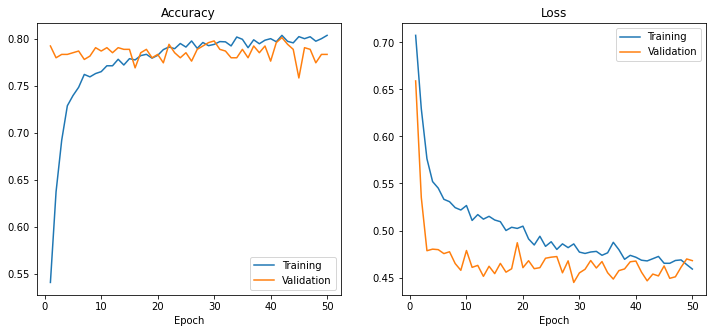

In [80]:
fig,ax=plt.subplots(ncols=2,figsize=(12,5))
epochs=len(history.history['accuracy'])
ax[0].plot(range(1,epochs+1),history.history['accuracy'],label='Training')
ax[0].plot(range(1,epochs+1),history.history['val_accuracy'],label='Validation')
ax[0].set_title('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend()

ax[1].plot(range(1,epochs+1),history.history['loss'],label='Training')
ax[1].plot(range(1,epochs+1),history.history['val_loss'],label='Validation')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

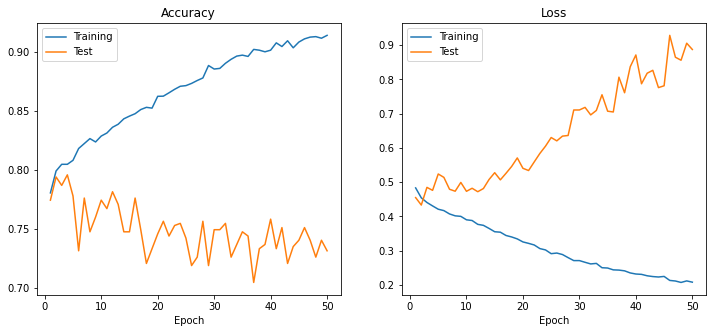

In [ ]:
fig,ax=plt.subplots(ncols=2,figsize=(12,5))
epochs=len(history.history['accuracy'])
ax[0].plot(range(1,epochs+1),history.history['accuracy'],label='Training')
ax[0].plot(range(1,epochs+1),history.history['val_accuracy'],label='Test')
ax[0].set_title('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend()

ax[1].plot(range(1,epochs+1),history.history['loss'],label='Training')
ax[1].plot(range(1,epochs+1),history.history['val_loss'],label='Test')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

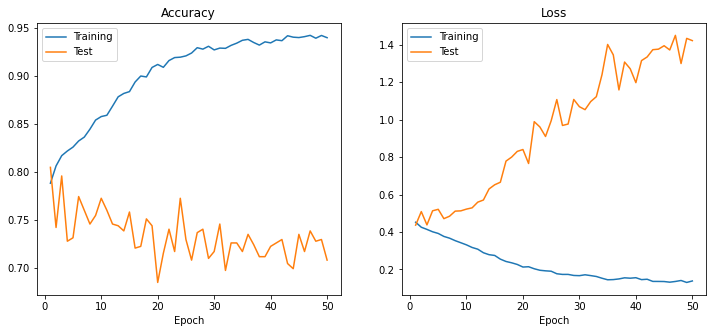

In [ ]:
fig,ax=plt.subplots(ncols=2,figsize=(12,5))
epochs=len(history.history['accuracy'])
ax[0].plot(range(1,epochs+1),history.history['accuracy'],label='Training')
ax[0].plot(range(1,epochs+1),history.history['val_accuracy'],label='Test')
ax[0].set_title('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend()

ax[1].plot(range(1,epochs+1),history.history['loss'],label='Training')
ax[1].plot(range(1,epochs+1),history.history['val_loss'],label='Test')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

## 8 - Model Evaluation : ANN
---

## 9 - Model Inference

## 10 - Pengambilan Kesimpulan

Kesimpulan dari Project ini adalah :

1. Dari dataset awal memiliki ukuran 145460 baris dan 23 kolom selanjutnya dibagi menjadi :

                - 60 baris untuk Data inference.
                - 80% dari 14560 data untuk Train set.
                - 20% sisa data untuk Test set.

2. Dari hasil loading data info dapat dilihat bahwa hampir setiap kolom memiliki missing values.

3. Dari hasil Preprocessing, diketahui :

                - normal distribution :
                                 ['mintemp', 'maxtemp', 'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'day', 'month', 'year']

                - skewed distribution :
                                ['rainfall', 'evaporation', 'windgustspeed', 'windspeed9am', 'windspeed3pm']

        
    dengan rincian outlier :

        Normal distirbution :
                        mintemp : 13  (0.01)%
                        maxtemp : 269  (0.23)%
                        sunshine : 0  (0.0)%
                        humidity9am : 361  (0.31)%
                        humidity3pm : 0  (0.0)%
                        pressure9am : 395  (0.34)%
                        pressure3pm : 328  (0.28)%
                        cloud9am : 0  (0.0)%
                        cloud3pm : 0  (0.0)%
                        temp9am : 110  (0.09)%
                        temp3pm : 330  (0.28)%
                        day : 0  (0.0)%
                        month : 0  (0.0)%
                        year : 0  (0.0)%

        Skewed distribution :
                        rainfall : 18581  (16.18)%
                        evaporation : 392  (0.34)%
                        windgustspeed : 113  (0.1)%
                        windspeed9am : 85  (0.07)%
                        windspeed3pm : 59  (0.05)%

    - Handling missing values pada kasus ini dihandle dengan 3 cara :
                        1. dropping untuk missing values MCAR dan < 5%
                        2. capping MAR
                        3. fillna untuk MCAR dan > 5%


    - Rincian jenis missing values pada dataset :

                            - mintemp : MCAR
                            - maxtemp : MCAR
                            - rainfall : MCAR
                            - Evaporation : MCAR 
                            - Sunshine : MCAR #mostly NA when Evaporation NA
                            - windgustdir : MCAR #mostly NA when windgustspeed NA
                            - windgustspeed : MCAR #mostly NA when windgustspeed NA
                            - winddir9am : MCAR
                            - winddir3pm : MCAR
                            - windspeed9am : MAR (NA if winddir9am NA)
                            - Windspeed3pm : MAR (NA if winddir3pm NA)
                            - Humidity9am : MCAR
                            - Humidity3pm : MCAR
                            - Pressure9am : MCAR
                            - pressure3pm : MCAR
                            - cloud9am : MCAR
                            - cloud3pm : MCAR
                            - temp9am : MCAR
                            - temp3pm : MCAR
                            - raintoday : MAR (NA if rainfall NA)

4. Dalam proses Model Training, kolom yang awalnya 23 kolom telah direduksi menjadi 11 kolom saja melalui proses Feature Selection dengan melihat korelasi antara kolom data dengan target.

5. Model dibuat dan ditraining dengan menggunakan metode logistic regression dan SVM dengan emnggunakan support vector classification. 

6. Selanjutnya, Model di evaluasi dengan menggunakan metrics Accuracy_score dan Classification report. Diperoleh hasil accuracy model yang telah dibuat memiliki akurasi yang sama yaitu 85%.





---

## Conclusions, Assumptions, Overall Analysis

`put your conclusions here`